In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

/home/w_lander/anaconda3/envs/dowgrade/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [3]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
# MedInc       - median income in block group - медианный доход
# HouseAge     - median house age in block group - медианный возраст дома
# AveRooms     - average number of rooms per household - среднее количество комнат на домохозяйство
# AveBedrms    - average number of bedrooms per household - среднее количество спален на домохозяйство
# Population   - block group population - численность
# AveOccup     - average number of household members - среднее количество членов домохозяйства
# Latitude     - block group latitude - широта
# Longitude    - block group longitude - долгота

### В качестве датасета используется набор данных о жилищных условиях и ценах на жилье в Калифорнии (California housing dataset), доступный в библиотеках Python (например, sklearn.datasets).

Анализ и подготовка данных:

- Загрузите датасет California housing dataset.
- Выполните базовый анализ данных: вывод размера выборки, проверка на пропущенные значения, статистический анализ числовых переменных.
- Визуализируйте распределения нескольких выбранных числовых переменных и корреляции между ними.

In [5]:
df_housing = pd.DataFrame(housing.data, columns=housing.feature_names)

In [6]:
df_housing['Target'] = housing.target

In [7]:
df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
df_housing.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')

In [10]:
df_housing.shape

(20640, 9)

In [11]:
df_housing.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

In [12]:
# проверим дубликаты
df_housing.duplicated().sum()

0

In [13]:
df_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


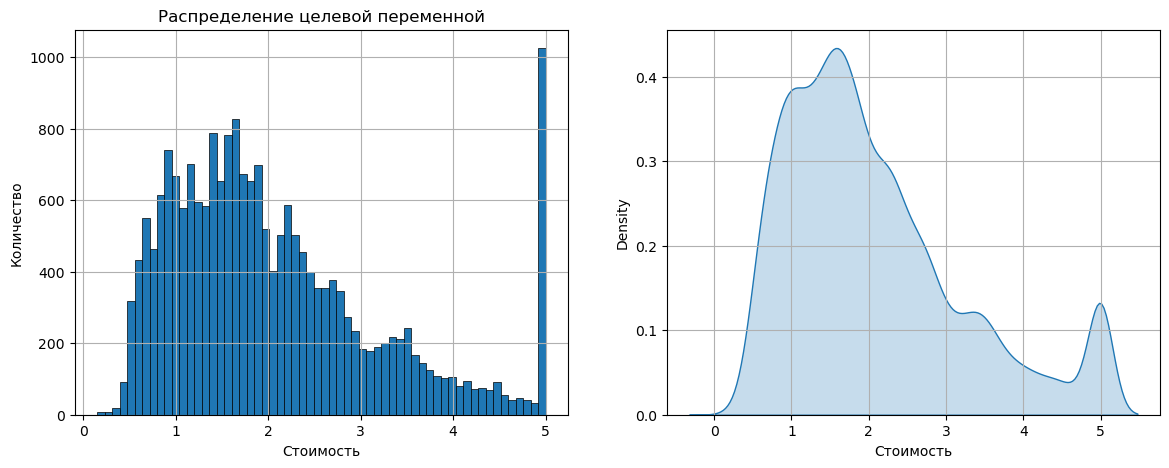

В целом нормальное распределение, но есть около 1000 объектов стоимость выше 500.000$


In [14]:
plt.figure(figsize=(14,5))
plt.subplot(121)
df_housing['Target'].hist(density=False, bins=60, linewidth=0.5, edgecolor='k')
plt.title('Распределение целевой переменной')
plt.ylabel('Количество')
plt.xlabel('Стоимость')
# plt.grid(False)
plt.subplot(122)
sns.kdeplot(df_housing['Target'], shade=True, legend=False)
plt.xlabel('Стоимость')
plt.grid()

plt.show()
print('В целом нормальное распределение, но есть около 1000 объектов стоимость выше 500.000$')

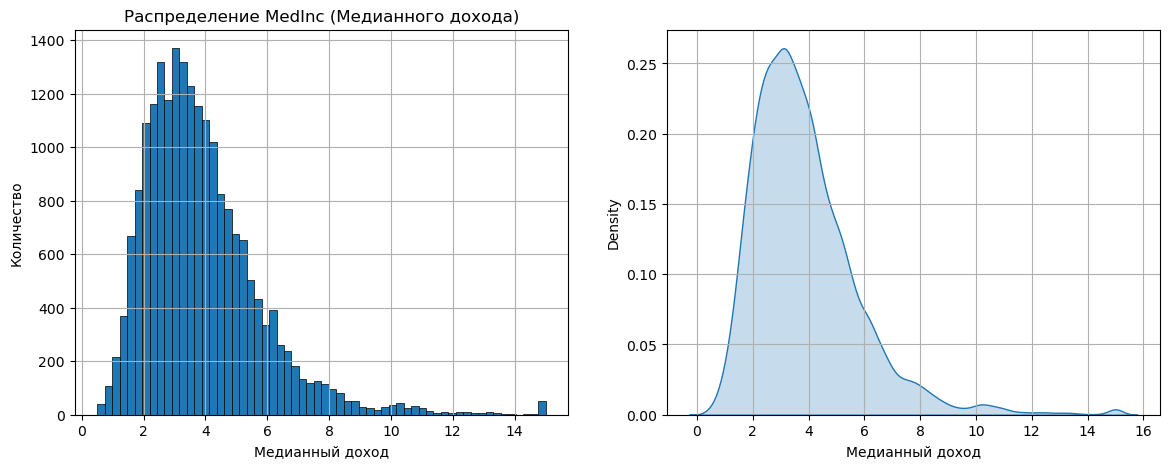

В целом нормальное распределение, есть небольшая группа людей, которые зарабатывают больше всех


In [15]:
plt.figure(figsize=(14,5))
plt.subplot(121)
df_housing['MedInc'].hist(density=False, bins=60, linewidth=0.5, edgecolor='k')
plt.title('Распределение MedInc (Медианного дохода)')
plt.ylabel('Количество')
plt.xlabel('Медианный доход')
# plt.grid(False)
plt.subplot(122)
sns.kdeplot(df_housing['MedInc'], shade=True, legend=False)
plt.xlabel('Медианный доход')
plt.grid()

plt.show()
print('В целом нормальное распределение, есть небольшая группа людей, которые зарабатывают больше всех')

#### Построим матрицу корреляции для выявления линейной зависимоти

In [16]:
# подготовим признаки
df_corr = df_housing.select_dtypes(include=('float64'))

In [17]:
corr_matrix = df_corr.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.1] = 0

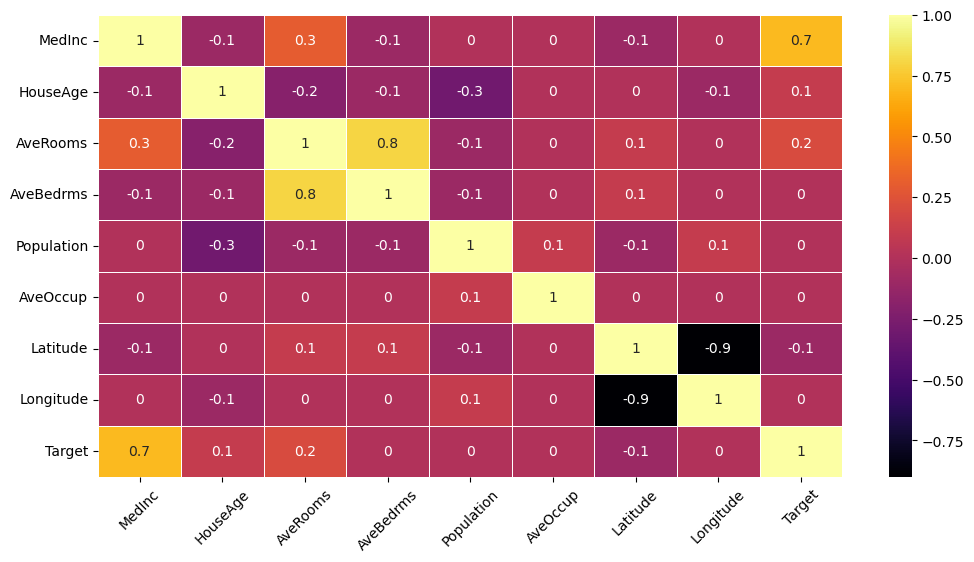

In [18]:
plt.figure(figsize=(12, 6))

sns.heatmap(corr_matrix, annot=True, linewidths=0.7, cmap='inferno')
plt.xticks(rotation=45)
#plt.yticks(rotation=35)
plt.show()

In [19]:
# Вычисляем коэффициент кореляции Пирсона
import scipy.stats as stats
corr_coeff, p_value = stats.pearsonr(df_housing['MedInc'], df_housing['Target'])

print(f'Коэффициент корреляции Пирсона: {corr_coeff}')
print(f'P-значение: {p_value}')

Коэффициент корреляции Пирсона: 0.6880752079585478
P-значение: 0.0


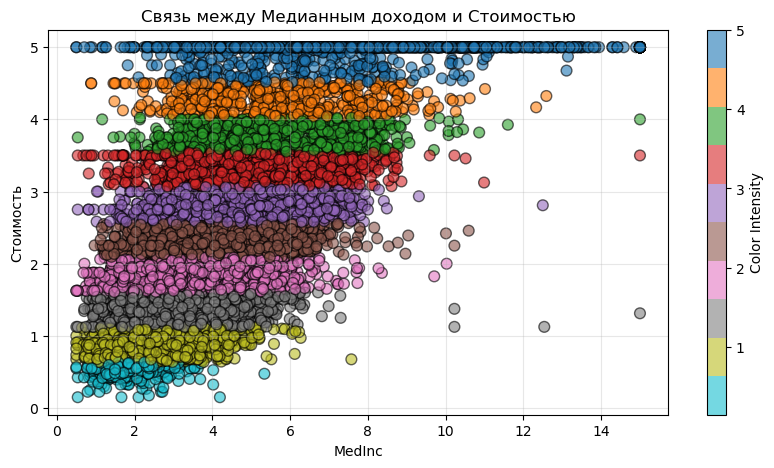

Чем больше Медианный доход, тем выше Стоимость


In [20]:
# Построение графика рассеивания
plt.figure(figsize=(10,5))
plt.scatter(data=df_housing, x=df_housing['MedInc'], c=df_housing['Target'], y='Target',alpha=0.6, linewidths=1, s=60, edgecolors='k', cmap='tab10_r')

plt.title('Связь между Медианным доходом и Стоимостью')
plt.xlabel('MedInc')
plt.ylabel('Стоимость')
plt.colorbar(label='Color Intensity')
plt.grid(alpha=0.3)

plt.show()
print('Чем больше Медианный доход, тем выше Стоимость')

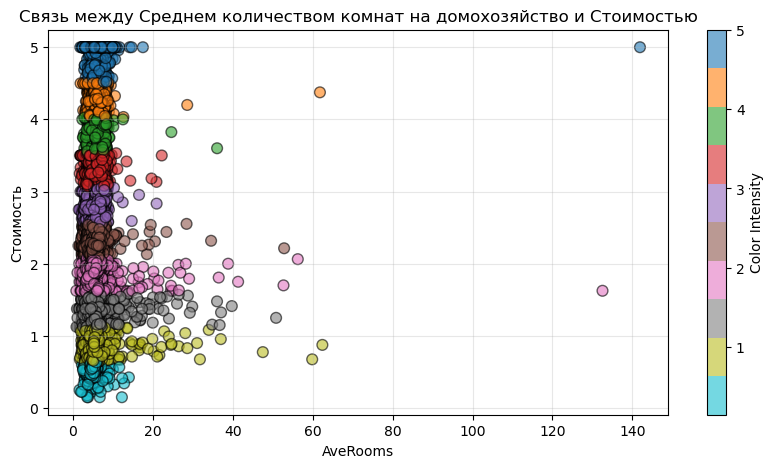

Чем больше Количество комнат на домохозяйство, тем выше Стоимость


In [21]:
# Построение графика рассеивания
plt.figure(figsize=(10,5))
plt.scatter(data=df_housing, x=df_housing['AveRooms'], c=df_housing['Target'], y='Target',alpha=0.6, linewidths=1, s=60, edgecolors='k', cmap='tab10_r')

plt.title('Связь между Среднем количеством комнат на домохозяйство и Стоимостью')
plt.xlabel('AveRooms')
plt.ylabel('Стоимость')
plt.colorbar(label='Color Intensity')
plt.grid(alpha=0.3)

plt.show()
print('Чем больше Количество комнат на домохозяйство, тем выше Стоимость')

### Построение модели линейной регрессии:

- Разделите данные на обучающий и тестовый набор в соотношении 80/20.
- Используйте только две переменные (по вашему выбору) для построения модели линейной регрессии. Обоснуйте ваш выбор.
- Постройте модель линейной регрессии, обучите ее на обучающем наборе и сделайте предсказания на тестовом.
- Оцените качество модели с помощью подходящих метрик (R2, MSE, MAE).
- Проведите эксперименты с различными признаками, попробуйте увеличить количество признаков и сравните с базовыми метриками.

In [22]:
df_housing.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')

In [23]:
# Используйте только две переменные (по вашему выбору) для построения модели линейной регрессии. Обоснуйте ваш выбор.
# 'MedInc', коэф. 0.7 указывает на сильную линейную связь с целевой переменной
# 'AveRooms', коэф. 0.2 указывает на слабую линейную связь с целевой переменной
train = df_housing[['MedInc', 'AveRooms']]
test = df_housing['Target']  # Целевая переменная

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, test, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [25]:
X_train.head()

,MedInc,AveRooms
7061,4.1312,5.882353
14689,2.8631,4.401210
17323,4.2026,5.617544
10056,3.1094,5.869565
15750,3.3068,4.801205


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)

In [28]:
print('Результаты на обучающей выборке:')
print(f'MSE: {mean_squared_error(y_train, y_train_pred)}')
print(f'MAE: {mean_absolute_error(y_train, y_train_pred)}')
print(f'r2_socre: {r2_score(y_train, y_train_pred)}')

Результаты на обучающей выборке:
MSE: 0.6977291798470149
MAE: 0.6201581996978964
r2_socre: 0.4791884191787539


In [29]:
y_test_pred = lr.predict(X_test)

In [30]:
print('Результаты на тестовой выборке:')
print(f'MSE: {mean_squared_error(y_test, y_test_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_test_pred)}')
print(f'r2_socre: {r2_score(y_test, y_test_pred)}')

Результаты на тестовой выборке:
MSE: 0.682629834896124
MAE: 0.6171952532199148
r2_socre: 0.4799169710454817


### Увеличим количество признаков

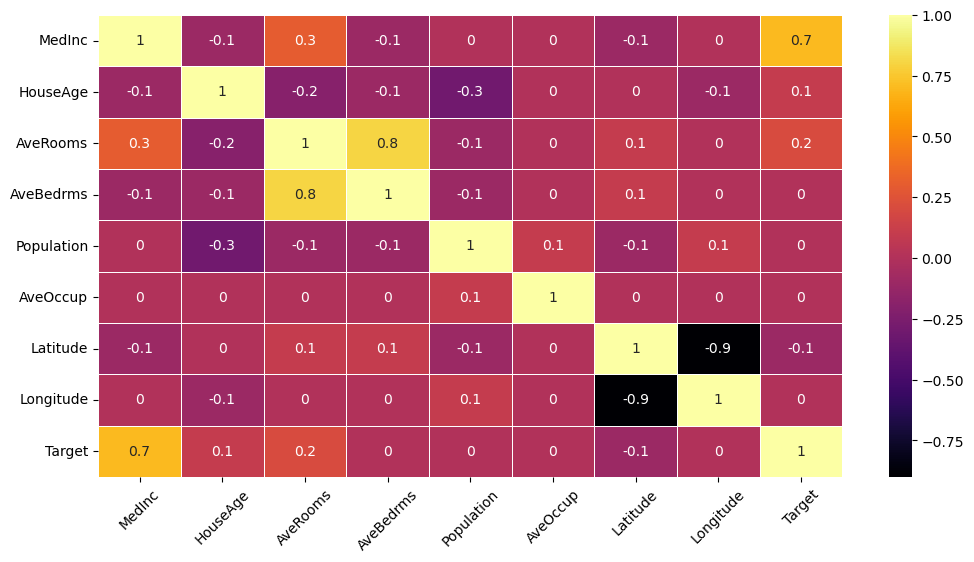

In [31]:
plt.figure(figsize=(12, 6))

sns.heatmap(corr_matrix, annot=True, linewidths=0.7, cmap='inferno')
plt.xticks(rotation=45)
#plt.yticks(rotation=35)
plt.show()

In [32]:
# Признаки 'HouseAge' имеет слабую кореляц. к целевой переменной. 
# 'AveBedrms' имеет сильную корреляцию c 'Averooms'
# 'Latitude', имеет сильную корреляцию c 'Longitude'

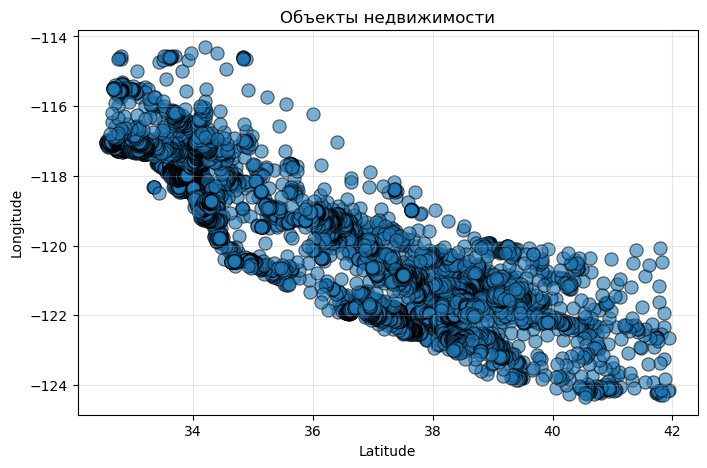

In [33]:
# Построение графика рассеивания
plt.figure(figsize=(8,5))
plt.scatter(data=df_housing, x=df_housing['Latitude'], y='Longitude',alpha=0.6, linewidths=0.8, s=90, edgecolors='k')

plt.title('Объекты недвижимости')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.grid(alpha=0.3)

plt.show()

In [34]:
# - Проведите эксперименты с различными признаками, попробуйте увеличить количество признаков и сравните с базовыми метриками.
train = df_housing[['MedInc', 'AveRooms', 'HouseAge','Latitude', 'Longitude', 'AveBedrms',]]
test = df_housing['Target']  # Целевая переменная

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, test, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [36]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)

In [37]:
print('Результаты на обучающей выборке:')
print(f'MSE: {mean_squared_error(y_train, y_train_pred)}')
print(f'MAE: {mean_absolute_error(y_train, y_train_pred)}')
print(f'r2_socre: {r2_score(y_train, y_train_pred)}')

Результаты на обучающей выборке:
MSE: 0.5250980526485766
MAE: 0.5318691460675405
r2_socre: 0.6080468543023725


In [38]:
y_test_pred = lr.predict(X_test)

In [39]:
print('Результаты на тестовой выборке:')
print(f'MSE: {mean_squared_error(y_test, y_test_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_test_pred)}')
print(f'r2_socre: {r2_score(y_test, y_test_pred)}')

Результаты на тестовой выборке:
MSE: 0.5316178381022192
MAE: 0.5280229176249487
r2_socre: 0.594970214672015


In [40]:
# Благодаря корреляционному анализу понимаем, существует ли линейная зависимость между переменными и насколько она сильна.